In [2]:
import os, sys

from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

Setting environment for Gordon


No vtk


In [3]:
from pandas import DataFrame

In [6]:
stack = 'MD657'
_, sec2fn = DataManager.load_sorted_filenames(stack)
first_sec, last_sec = DataManager.load_cropbox(stack)[4:]

In [ ]:
info = {}
for sec in range(first_sec, last_sec+1):
    print sec
    fn = sec2fn[sec]
    im = imread('/home/yuncong/csd395/CSHL_data/MD657_lossy_tif/%s_lossy.jp2.tif' % fn)[..., :3]
    green = im[..., 1]
    gf = green.flatten()
    blue = im[..., 2]
    bf = blue.flatten()
    info[sec] = {'gmax': green.max(),
    'bmax': blue.max(),
    'g99.99': np.percentile(gf, 99.99),
    'g99.999': np.percentile(gf, 99.999),
    'g99.9999': np.percentile(gf, 99.9999),
    'b99.99': np.percentile(bf, 99.99),
    'b99.999': np.percentile(bf, 99.999),
    'b99.9999': np.percentile(bf, 99.9999)}

In [20]:
d = DataFrame(info).T

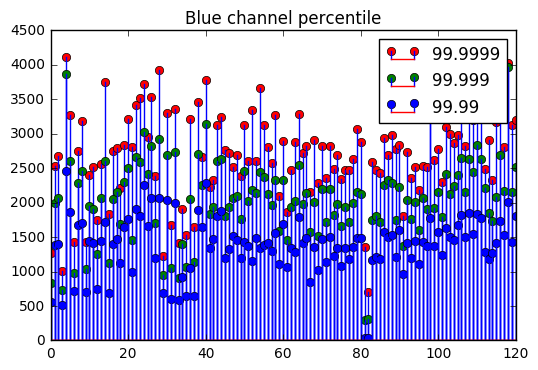

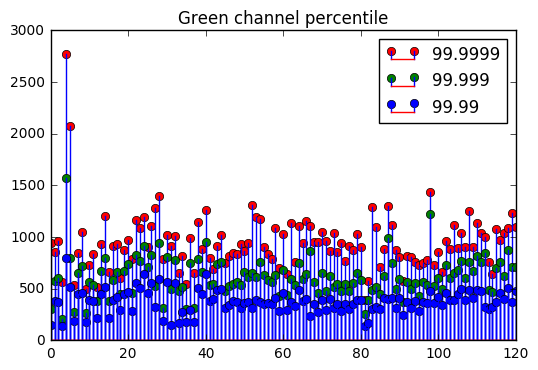

In [32]:
plt.figure();
plt.stem(d['b99.9999'], markerfmt='ro', label='99.9999');
plt.stem(d['b99.999'], markerfmt='go', label='99.999');
plt.stem(d['b99.99'], markerfmt='bo', label='99.99');
plt.title('Blue channel percentile');
plt.legend();

plt.figure();
plt.stem(d['g99.9999'], markerfmt='ro', label='99.9999');
plt.stem(d['g99.999'], markerfmt='go', label='99.999');
plt.stem(d['g99.99'], markerfmt='bo', label='99.99');
plt.title('Green channel percentile');
plt.legend();

# Contrast Stretch Neurotrace Blue

In [4]:
from skimage.exposure import rescale_intensity

In [34]:
blue = im[..., 2]

IndexError: index 75 is out of bounds for axis 0 with size 75

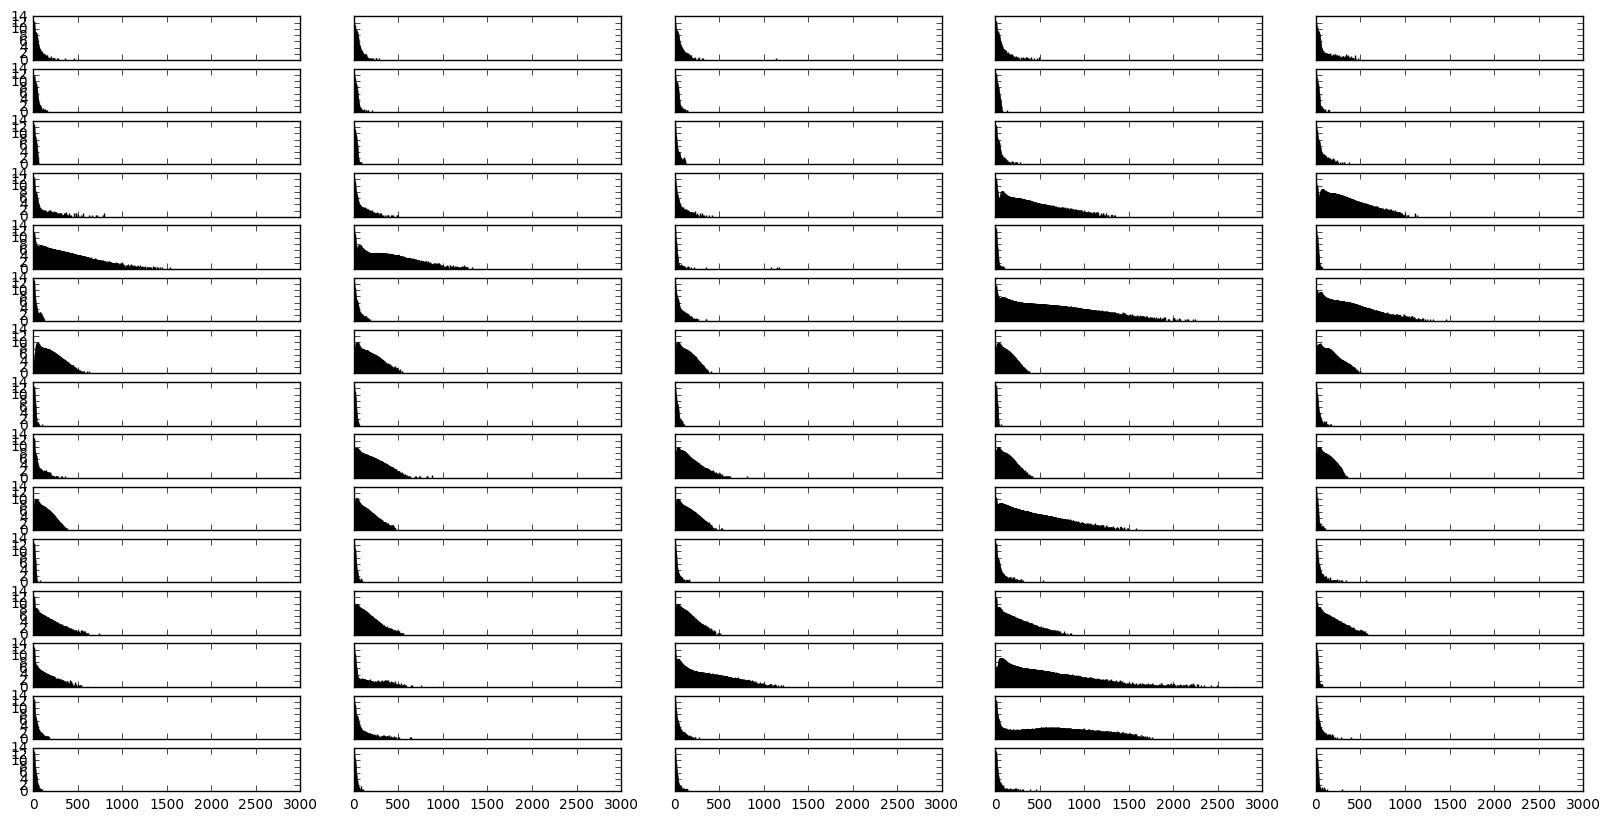

In [66]:
ys = range(1000, im.shape[0]-2000, 2000)
xs = range(1000, im.shape[1]-2000, 2000)

fig, axes = plt.subplots(int(np.ceil(len(ys)*len(xs)/5)), 5, sharex=True, sharey=True, figsize=(20, 10))
axes = axes.flatten()

c = 0
for yi, y in enumerate(ys):
    for xi, x in enumerate(xs):
        b = blue[y:y+1000,x:x+1000]
        count, left_edges = np.histogram(b.flatten(), bins=np.arange(b.min(), b.max()))
        axes[c].bar(left_edges[:-1], np.log(count), width=.1);
        c += 1
        
plt.show();

In [ ]:
ys = range(1000, im.shape[0]-2000, 2000)
xs = range(1000, im.shape[1]-2000, 2000)

fig, axes = plt.subplots(len(ys), len(xs), sharex=True, sharey=True, figsize=(20, 10))

for yi, y in enumerate(ys):
    for xi, x in enumerate(xs):
        b = blue[y:y+1000,x:x+1000]
        count, left_edges = np.histogram(b.flatten(), bins=np.arange(b.min(), b.max()))
        axes[yi][xi].bar(left_edges[:-1], np.log(count), width=.1);
        
plt.show();

In [50]:
im.shape

(14848, 27125, 3)

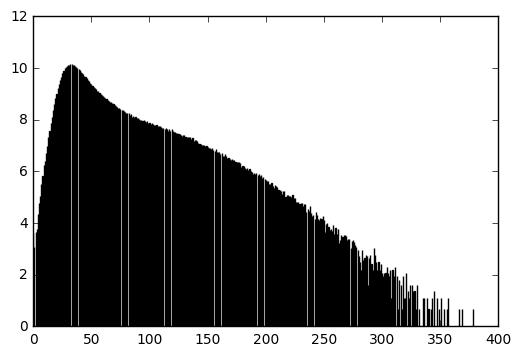

In [51]:
y = 7000
x = 13000
b = blue[y:y+1000,x:x+1000]
count, left_edges = np.histogram(b.flatten(), bins=np.arange(b.min(), b.max()))
plt.bar(left_edges[:-1], np.log(count), width=.1);
plt.show();

In [56]:
blue_out = rescale_intensity(blue, in_range=(0, 350), out_range=np.uint8).astype(np.uint8)

In [ ]:
display_image(blue_out[8000:11000, 8000:11000])

In [61]:
from skimage.exposure import adjust_gamma

In [62]:
blue_out_gamma = adjust_gamma(blue_out, .5)

In [63]:
display_image(blue_out_gamma[8000:11000, 8000:11000])

/oasis/projects/nsf/csd395/yuncong/Brain/preprocess/tmp.jpg

In [ ]:
for sec in range(first_sec, last_sec+1, 5):
# for sec in [132]: # example blue, random region
# for sec in [120]: # has good green
    
    print sec
    fn = sec2fn[sec]
    im = imread('/home/yuncong/csd395/CSHL_data/MD657_lossy_tif/%s_lossy.jp2.tif' % fn)[..., :3]
    
#     plt.figure();
#     count, left_edges = np.histogram(im[...,2].flatten(), bins=np.arange(im[...,2].min(), im[...,2].max()))
#     plt.bar(left_edges[:-1], np.log(count), width=.1);
#     plt.title('Log histogram before contrast stretching');
#     plt.xlabel('Intensity');
#     plt.savefig('/home/yuncong/csd395/ntb_histograms/%(fn)s_pre_stretch.png' % dict(fn=fn))
#     plt.close();
    
    imin = 0
    imax = 68
#     imax = np.percentile(im.flatten(), 99.9999)
#     print imax

#     im_flattened = im.flatten()
#     clip_values = {clip_perc: np.percentile(im_flattened, 100.-clip_perc) for clip_perc in [1e-4, 1e-5, 1e-6]}
    
#     imax = clip_values[1e-5]
#     print imax

    im_out = rescale_intensity(im[...,2], in_range=(imin, imax), out_range=np.uint8)
    
#     plt.figure();
#     count, left_edges = np.histogram(im_out.flatten(), bins=np.arange(im_out.min(), im_out.max()))
#     plt.bar(left_edges[:-1], np.log(count), width=.1);
#     plt.title('Log histogram after contrast stretching, clip=%d' % imax);
#     plt.xlabel('Intensity');
#     plt.savefig('/home/yuncong/csd395/ntb_histograms/%(fn)s_post_stretch.png' % dict(fn=fn))
#     plt.close();
    
    imsave('/home/yuncong/csd395/ntb_histograms/small/%(fn)s_post_stretch.tif' % dict(fn=fn), 
           im_out[::10, ::10].astype(np.uint8))
#     imsave('/home/yuncong/csd395/ntb_histograms/crop/%(fn)s_B.tif' % dict(fn=fn), 
#            im_out[8030:8030+920, 15650:15650+1490].astype(np.uint16)) # random blue region
#     imsave('/home/yuncong/csd395/ntb_histograms/crop/%(fn)s_G.tif' % dict(fn=fn), 
#            im_out[7863:7863+1256, 108440:10844+1303].astype(np.uint8))

37
